#PROBLEM 8: Hierarchical Clustering
Implement hierarchical clustering. Start the bottom of the hierarchy with all point (or at least 5000 sampled) and build the hierarchy by repeatedly "joining the closest" clusters with avg_dist or single_dist criteria up to one big cluster (full hierarchy). Then decide how to cut it for K=2 or K=5 or K=10 clusters and evaluate. Run on moons dataset.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from collections import Counter
import pickle

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
moons = pd.read_csv('/content/drive/MyDrive/USML/HW 2B/moons.csv')

In [27]:
#moons = moons.sample(100)
moons_np = moons.to_numpy()

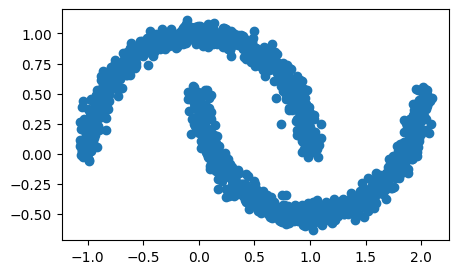

In [28]:
plt.figure(figsize=(5,3))
plt.scatter(moons_np[:,0], moons_np[:,1])

In [29]:
def hierarchical_clustering(K):
  # Initializing pairwise distance and sorting them
  heap = []

  for i in range(len(moons_np)-1):
    for j in range(i+1, len(moons_np)):
      heap.append([np.linalg.norm(moons_np[i]-moons_np[j]), (i,j)])

  heap.sort(key=lambda x: x[0])

  # -ve value in disjoint set is a cluster, +ve value is index of parent
  disjointSet = np.arange(-1, -1501, -1)

  def find(node):
    if(disjointSet[node] < 0):
      return node
    disjointSet[node] = find(disjointSet[node]) # collapsing find
    return disjointSet[node]

  def union(node1, node2, num_cluster):
    parent1 = find(node1)
    parent2 = find(node2)
    if(parent1 != parent2): # each union call that merges 2 clusters reduces number of clusters by 1
      num_cluster -= 1
      disjointSet[parent2] = parent1
      find(node2) # resets parent of node2 to parent 1
    return num_cluster

  # Hierarchical clustering loop
  k = np.sum(np.unique(disjointSet) < 0)
  while(k > K and len(heap)>0):
    dist,(node1,node2) = heap.pop(0)
    k = union(node1, node2, k)

  # there are few pts whose parent idx is their immediate parent rather than the cluster idx they belong to
  for i in range(len(disjointSet)):
    if(disjointSet[i] > 0):
      while(disjointSet[i] > 0):
        disjointSet[i] = disjointSet[disjointSet[i]]

  # vizualizing result
  coordinates = moons_np
  labels = np.array(disjointSet)

  unique_labels = np.unique(labels)

  colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
  color_map = {label: color for label, color in zip(unique_labels, colors)}

  x = coordinates[:, 0]
  y = coordinates[:, 1]

  plt.figure(figsize=(8, 6))

  for i, label in enumerate(labels):
      plt.scatter(x[i], y[i], c=[color_map[label]], label=label, s=100, edgecolor='k')

  # Remove duplicate labels from legend
  handles, labels = plt.gca().get_legend_handles_labels()
  by_label = dict(zip(labels, handles))
  plt.legend(by_label.values(), by_label.keys())

  # Add labels and title
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.title('Scatter Plot with Different Colors by Label')

  # Show plot
  plt.show()
  cnter = Counter(disjointSet)
  print(cnter)


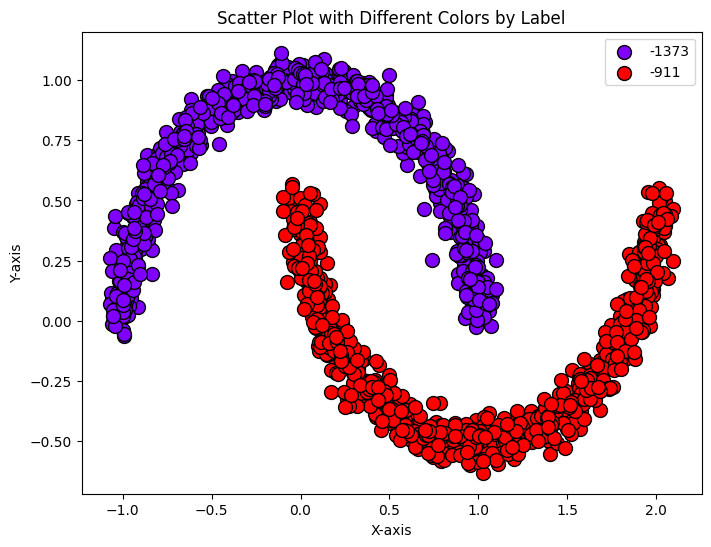

Counter({-1373: 750, -911: 750})


In [30]:
hierarchical_clustering(2)

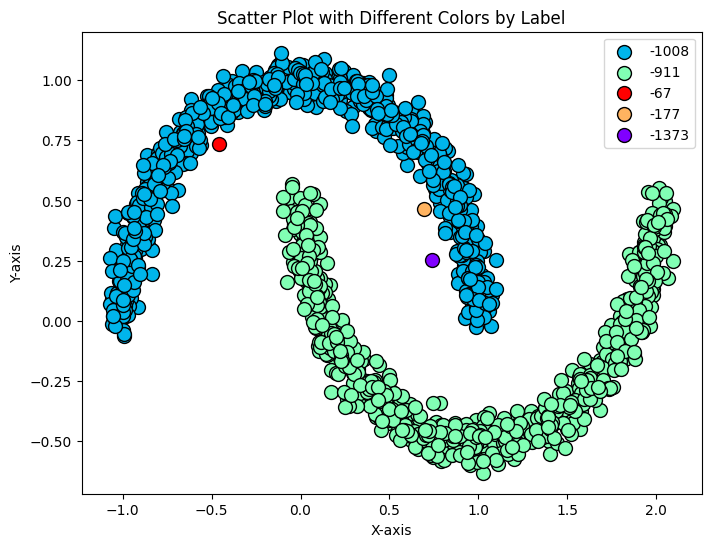

Counter({-911: 750, -1008: 747, -67: 1, -177: 1, -1373: 1})


In [31]:
hierarchical_clustering(5)

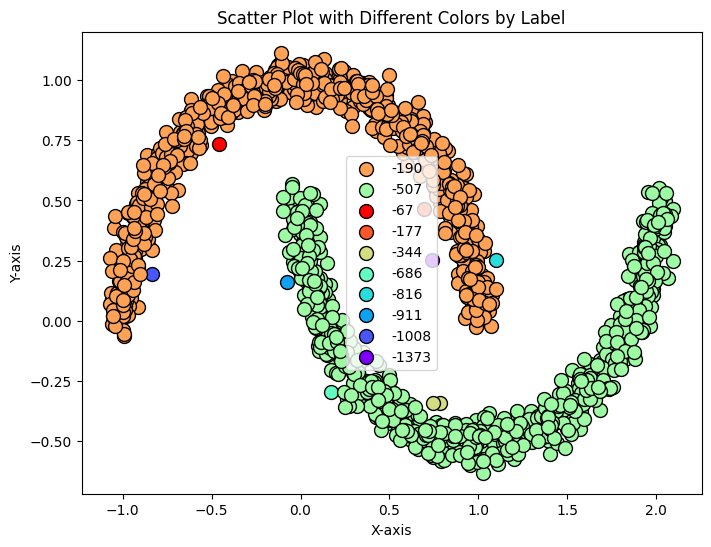

Counter({-507: 746, -190: 745, -344: 2, -67: 1, -177: 1, -686: 1, -816: 1, -911: 1, -1008: 1, -1373: 1})


In [32]:
hierarchical_clustering(10)